<a href="https://colab.research.google.com/github/shushantarora009/MachineLearning/blob/main/feature_selection_using_mse_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle datasets  download houseprice-data-cleaning-visualization

404 - Not Found


In [17]:
!unzip house-prices-advanced-regression-techniques.zip -d .

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: ./data_description.txt  
  inflating: ./sample_submission.csv  
  inflating: ./test.csv              
  inflating: ./train.csv             


In [18]:
df = pd.read_csv('train.csv')

In [19]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
df.shape

(1460, 81)

In [22]:
numerical_vars = list(df.select_dtypes(include= ['int16','int32','int64','float16','float32','float64']).columns)

In [23]:
df = df[numerical_vars]

In [28]:
df.shape

(1460, 38)

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['SalePrice'],axis=1),df['SalePrice'],random_state=0,test_size=0.2)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1168, 37), (292, 37), (1168,), (292,))

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,mean_squared_error
mse_values = []
for feature in X_train.columns:
  clf = DecisionTreeRegressor()
  clf.fit(X_train[feature].fillna(0).to_frame(),y_train)
  y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
  mse_values.append(mean_squared_error(y_test,y_scored))



In [39]:
mse_values[0:10]

[14725642722.219177,
 5374257911.543206,
 7648568082.927064,
 7696598288.647945,
 2287867544.7441497,
 5982560407.694949,
 4668342580.6888275,
 5451934400.948551,
 8448923363.97374,
 6297898320.078503]

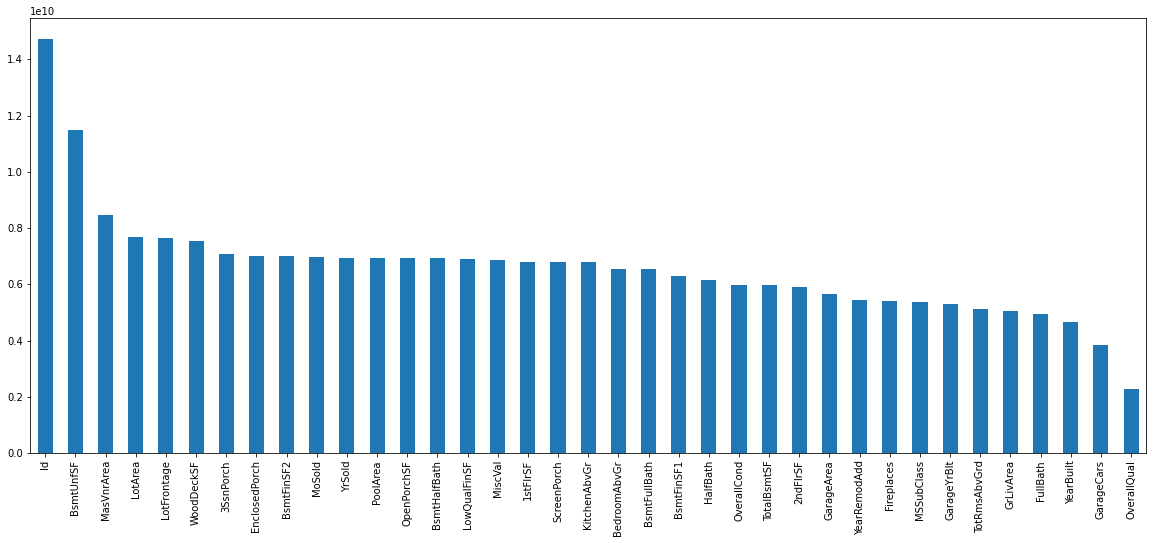

In [41]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [42]:
selected_features = mse_values[mse_values<np.mean(mse_values)].index
selected_features

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [43]:
len(selected_features)

18